Wildfire Proximity Computation Example This Jupyter notebook contains example code that illustrate how to perform some basic geodetic computations related to the Wildfire course project. The notebook is structure as a set of examples that illustrate something about the structure of the data or illustrate a way to compute specific values. This notebook is not a tutorial on performing geodetic computations, but illustrates a number of key concepts. This notebook should provide enough information to complete the Wildfire assignment.

The complete Wildfire dataset can be retrieved from a US government repository. I have noticed that the repository is sometimes "down" and does not respond. It probably makes sense to get the dataset as soon as possible.

This notebook has dependencies on Pyproj, the geojson module and on the wildfire user module. Pyproj and geojson can be installed via pip. The wildfire user module should be downloaded from the course website, unzipped, and moved into the folder pointed to by your PYTHONPATH system variable.

License This code example was developed by Dr. David W. McDonald for use in DATA 512, a course in the UW MS Data Science degree program. This code is provided under the Creative Commons CC-BY license. Revision 1.0 - August 13, 2023

Preliminaries First we start with some imports and some constant definitions.

In [1]:
!pip install GeoJSON

In [4]:
#    Import some standard python modules
import json
#
#    The module pyproj is a standard module that can be installed using pip or your other favorite
#    installation tool. This module provides tools to convert between different geodesic coordinate systems
#    and for calculating distances between points (coordinates) in a specific geodesic system.

import geojson

!pip install pyproj

from pyproj import Transformer, Geod

from tqdm import tqdm

import pandas as pd

     |████████████████████████████████| 6.1 MB 1.8 MB/s eta 0:00:01


In [27]:
FILENAME = "/Users/kukku/Downloads/GeoJSON Exports/USGS_Wildland_Fire_Combined_Dataset.json"
CITY_LOCATIONS = {
    'Cladwell' :     {'city'   : 'Cladwell',
                       'latlon' : [43.661766, -116.691559] }}

Load the wildfire data using the wildfire Reader object In the following cells we provide small code snippets that do the following:

Create a wildfire Reader() object and use it to open the sample data file. Once, opened, we have access to the header information so we print that to show the structure of that data. Use the Reader() object and the next() method to read a set of wildfire features. The small sample file should have 13 of them. Print one example feature showing the dictionary data structure of a feature. Access the geometry of one specific feature to get the 'ring' boundary of that specific fire - which is a list of geodetic coordinates. Note that some of the output cells are quite long. Once you understand what they are illustrating you might want to collapse them or comment out the print statements that generate the output.

Another note regarding terminology. In the GeoJSON standard, something that is to be represented geographically is generically called a 'feature'. In the case of the wildfire dataset every 'feature' is a wildfire. These terms are used somewhat interchangably below.

In [12]:
from wildfire.Reader import Reader as WFReader
#
#    This bit of code opens a new wildfire reader, gets the header information and prints it to the screen
#
print(f"Attempting to open '{FILENAME}' with wildfire.Reader() object")
wfreader = WFReader(FILENAME)
print()
#
#    Now print the header - it contains some useful information
#
header_dict = wfreader.header()
header_keys = list(header_dict.keys())

Attempting to open '/Users/kukku/Downloads/GeoJSON Exports/USGS_Wildland_Fire_Combined_Dataset.json' with wildfire.Reader() object



In [13]:
#
#    This sample code will load the whole sample file
#
MAX_FEATURE_LOAD = 100
feature_list = list()
feature_count = 0
# A rewind() on the reader object makes sure we're at the start of the feature list
# This way, we can execute this cell multiple times and get the same result 
wfreader.rewind()
# Now, read through each of the features, saving them as dictionaries into a list
feature = wfreader.next()
while feature:
    feature_list.append(feature)
    feature_count += 1
    # if we're loading a lot of features, print progress
    if (feature_count % 100) == 0:
        print(f"Loaded {feature_count} features")
    # loaded the max we're allowed then break
    feature = wfreader.next()
#
#    Print the number of items (features) we think we loaded
print(f"Loaded a total of {feature_count} features")
#
#    Just a validation check - did all the items we loaded get into the list?
print(f"Variable 'feature_list' contains {len(feature_list)} features")

Loaded 100 features
Loaded 200 features
Loaded 300 features
Loaded 400 features
Loaded 500 features
Loaded 600 features
Loaded 700 features
Loaded 800 features
Loaded 900 features
Loaded 1000 features
Loaded 1100 features
Loaded 1200 features
Loaded 1300 features
Loaded 1400 features
Loaded 1500 features
Loaded 1600 features
Loaded 1700 features
Loaded 1800 features
Loaded 1900 features
Loaded 2000 features
Loaded 2100 features
Loaded 2200 features
Loaded 2300 features
Loaded 2400 features
Loaded 2500 features
Loaded 2600 features
Loaded 2700 features
Loaded 2800 features
Loaded 2900 features
Loaded 3000 features
Loaded 3100 features
Loaded 3200 features
Loaded 3300 features
Loaded 3400 features
Loaded 3500 features
Loaded 3600 features
Loaded 3700 features
Loaded 3800 features
Loaded 3900 features
Loaded 4000 features
Loaded 4100 features
Loaded 4200 features
Loaded 4300 features
Loaded 4400 features
Loaded 4500 features
Loaded 4600 features
Loaded 4700 features
Loaded 4800 features
L

Loaded 38000 features
Loaded 38100 features
Loaded 38200 features
Loaded 38300 features
Loaded 38400 features
Loaded 38500 features
Loaded 38600 features
Loaded 38700 features
Loaded 38800 features
Loaded 38900 features
Loaded 39000 features
Loaded 39100 features
Loaded 39200 features
Loaded 39300 features
Loaded 39400 features
Loaded 39500 features
Loaded 39600 features
Loaded 39700 features
Loaded 39800 features
Loaded 39900 features
Loaded 40000 features
Loaded 40100 features
Loaded 40200 features
Loaded 40300 features
Loaded 40400 features
Loaded 40500 features
Loaded 40600 features
Loaded 40700 features
Loaded 40800 features
Loaded 40900 features
Loaded 41000 features
Loaded 41100 features
Loaded 41200 features
Loaded 41300 features
Loaded 41400 features
Loaded 41500 features
Loaded 41600 features
Loaded 41700 features
Loaded 41800 features
Loaded 41900 features
Loaded 42000 features
Loaded 42100 features
Loaded 42200 features
Loaded 42300 features
Loaded 42400 features
Loaded 425

Loaded 75300 features
Loaded 75400 features
Loaded 75500 features
Loaded 75600 features
Loaded 75700 features
Loaded 75800 features
Loaded 75900 features
Loaded 76000 features
Loaded 76100 features
Loaded 76200 features
Loaded 76300 features
Loaded 76400 features
Loaded 76500 features
Loaded 76600 features
Loaded 76700 features
Loaded 76800 features
Loaded 76900 features
Loaded 77000 features
Loaded 77100 features
Loaded 77200 features
Loaded 77300 features
Loaded 77400 features
Loaded 77500 features
Loaded 77600 features
Loaded 77700 features
Loaded 77800 features
Loaded 77900 features
Loaded 78000 features
Loaded 78100 features
Loaded 78200 features
Loaded 78300 features
Loaded 78400 features
Loaded 78500 features
Loaded 78600 features
Loaded 78700 features
Loaded 78800 features
Loaded 78900 features
Loaded 79000 features
Loaded 79100 features
Loaded 79200 features
Loaded 79300 features
Loaded 79400 features
Loaded 79500 features
Loaded 79600 features
Loaded 79700 features
Loaded 798

Loaded 112000 features
Loaded 112100 features
Loaded 112200 features
Loaded 112300 features
Loaded 112400 features
Loaded 112500 features
Loaded 112600 features
Loaded 112700 features
Loaded 112800 features
Loaded 112900 features
Loaded 113000 features
Loaded 113100 features
Loaded 113200 features
Loaded 113300 features
Loaded 113400 features
Loaded 113500 features
Loaded 113600 features
Loaded 113700 features
Loaded 113800 features
Loaded 113900 features
Loaded 114000 features
Loaded 114100 features
Loaded 114200 features
Loaded 114300 features
Loaded 114400 features
Loaded 114500 features
Loaded 114600 features
Loaded 114700 features
Loaded 114800 features
Loaded 114900 features
Loaded 115000 features
Loaded 115100 features
Loaded 115200 features
Loaded 115300 features
Loaded 115400 features
Loaded 115500 features
Loaded 115600 features
Loaded 115700 features
Loaded 115800 features
Loaded 115900 features
Loaded 116000 features
Loaded 116100 features
Loaded 116200 features
Loaded 1163

In [25]:
#
#    The 'feature_list' variable was created when we read the sample file in a code cell above
#    Now, we're just going to look at one single feature - see what is in there
#
SLOT = 0
wf_feature = feature_list[SLOT]

# Print everyting in this dictionary (i.e., wf_feature) - it's long
print(f"The wildfire feature from slot '{SLOT}' of the loaded 'feature_list'")
print(json.dumps(wf_feature, indent=4))


The wildfire feature from slot '0' of the loaded 'feature_list'
{
    "attributes": {
        "OBJECTID": 1,
        "USGS_Assigned_ID": 1,
        "Assigned_Fire_Type": "Wildfire",
        "Fire_Year": 1860,
        "Fire_Polygon_Tier": 1,
        "Fire_Attribute_Tiers": "1 (1)",
        "GIS_Acres": 3940.20708940724,
        "GIS_Hectares": 1594.5452365353703,
        "Source_Datasets": "Comb_National_NIFC_Interagency_Fire_Perimeter_History (1)",
        "Listed_Fire_Types": "Wildfire (1)",
        "Listed_Fire_Names": "Big Quilcene River (1)",
        "Listed_Fire_Codes": "No code provided (1)",
        "Listed_Fire_IDs": "",
        "Listed_Fire_IRWIN_IDs": "",
        "Listed_Fire_Dates": "Listed Other Fire Date(s): 2006-11-02 - NIFC DATE_CUR field (1)",
        "Listed_Fire_Causes": "",
        "Listed_Fire_Cause_Class": "Undetermined (1)",
        "Listed_Rx_Reported_Acres": null,
        "Listed_Map_Digitize_Methods": "Other (1)",
        "Listed_Notes": "",
        "Processing

In [15]:
#
#    Every feature has a 'geometry' which specifies geo coordinates that make up each geographic thing
#    In the case of the wildfire data, most wildfires are bounded shapes, circles, squares, etc. This is
#    represented by shapes called 'rings' in GeoJSON.
# 
# Get the geometry for the feature we pulled from the feature_list
wf_geometry = wf_feature['geometry']
# The largest shape (ring) is supposed to be item zero in the list of 'rings'
wf_bigest_ring = wf_geometry['rings'][0]

print(f"The largest ring of wf_feature['features'][{SLOT}]['rings'] consists of {len(wf_bigest_ring)} points.")

The largest ring of wf_feature['features'][0]['rings'] consists of 768 points.


Distance computations with Pyproj

One issue in performing geodetic computation is that any (all) geographic coordinate systems are eventually translated to the surface of the earth - which is not flat. That means every computation of distance between two points is some kind of arc (not actually a straight line). Further the earth is not a true sphere, its a type of ellipsoid. That means the amount of curvature varies depending upon where you are on the surface and the direction - which changes the distance.

Lucky for us there are geographers who like to write code and have built systems to simplify the computation of distances over the earth's surface. One of those systems is called Pyproj. It has functions that will convert coordinate points between (almost) any two of the many different geographic coordinate systems. As well, Pyproj provides ways to compute distances between two points (mostly assuming the points are already in the same coordinate system).

This example uses the Geod() object to calculate the distance between a slected starting city and all of the cities defined in our CITY_LOCATIONS dictionary (see CONSTANTS above).

The example calls the distances computed 'straight line' distances - because that is what you would have to use to find the distance between two cities using Google. If you didn't use some form of language like that Google would map roads to get you between a source and destination; that would never match our calculation.

Convert points between geodetic coordinate systems

One of the constraints in doing geodetic computations is that most of the time we need to have our points (the coordinates for places) in the same geographic coordinate system. There are tons and tons of coordinate systems. You can find descriptions of many of them at EPSG.io.

Looking at the wildfire header information, you can find this in the output of Example 1, we can see fields named "geometryType" and "spatialReference". This looks like:

    "geometryType": "esriGeometryPolygon",
    "spatialReference": {
        "wkid": 102008,
        "latestWkid": 102008
    },
This indicates that the geometry of our wildfire data are generic polygons and that they are expressed in a coordinate system with the well-known ID (WKID) 102008. This coordinate system is also known as ESRI:102008

If you look back at Example 2, you might have wondered about the line of code that says:

geocalc = Geod(ellps='WGS84')         # Use WGS84 ellipsoid representation of the earth
That string, 'WGS84', is a representation of the earth, that also relies on a well known coordinate system that is sometimes called 'decimal degrees' (DD). That decimal degrees system has an official name (or WKID) of EPSG:4326.

For the example below, what we're going to do is take the geometry of a fire feature, extract the largest ring (i.e., the largest boundary of the fire) and convert all of the points in that ring from the ESRI:102008 coordinate system to EPSG:4326 coordinates.

In [18]:
#
#    Transform feature geometry data
#
#    The function takes one parameter, a list of ESRI:102008 coordinates that will be transformed to EPSG:4326
#    The function returns a list of coordinates in EPSG:4326
def convert_ring_to_epsg4326(ring_data=None):
    converted_ring = list()
    #
    # We use a pyproj transformer that converts from ESRI:102008 to EPSG:4326 to transform the list of coordinates
    to_epsg4326 = Transformer.from_crs("ESRI:102008","EPSG:4326")
    # We'll run through the list transforming each ESRI:102008 x,y coordinate into a decimal degree lat,lon
    for coord in ring_data:
        lat,lon = to_epsg4326.transform(coord[0],coord[1])
        new_coord = lat,lon
        converted_ring.append(new_coord)
    return converted_ring

In [19]:
#
#   Convert one ring from the default to EPSG
#
#   There are two options here - depending upon whether you loaded data useing GeoJSON or the wildfire.Reader
#
#ring_in_epsg4326 = convert_ring_to_epsg4326(gj_bigest_ring)
#
ring_in_epsg4326 = convert_ring_to_epsg4326(wf_bigest_ring)
#
print(f"Ring consists of {len(ring_in_epsg4326)} points.")
#
#    If you want to print them out you can see what they look like converted.
#print(ring_in_epsg4326)
#for point in ring_in_epsg4326:
#    print(f"{point[0]},{point[1]}")


Ring consists of 768 points.


Compute distance between a place and a wildfire

The basic problem is knowing how far away a fire is from some location (like a city). One issue is that fires are irregularly shaped so the actual answer to that is a bit dependent upon the exact shape and how you want to think about the notion of 'distance'. For example, should we just find the closest point on the perimiter of a fire and call that the distance? Maybe we should find the centroid of the region, identify that as a geolocation (coordinate) and then calculate the distance to that? We can come up with numerous other ways.

The first bit of code finds the point on the perimiter with the shortest distance to the city (place) and returns the distance as well as the lat,lon of the perimeter point.

The second bit of code calculates the average distance of all perimeter points to the city (place) and returns that average as the distance. This is not quite what the centroid would be, but it is probably fairly close.

These are two reasonable ways to think about possible distance to a fire. But both require computing distance to a whole set of points on the perimeter of a fire.

In [41]:
def average_distance_from_place_to_fire_perimeter(place=None,ring_data=None):
    # convert the ring data to the right coordinate system
    ring = convert_ring_to_epsg4326(ring_data)    
    # create a epsg4326 compliant object - which is what the WGS84 ellipsoid is
    geodcalc = Geod(ellps='WGS84')
    # create a list to store our results
    distances_in_meters = list()
    # run through each point in the converted ring data
    for point in ring:
        # calculate the distance
        d = geodcalc.inv(place[1],place[0],point[1],point[0])
        distances_in_meters.append(d[2])
    #print("Got the following list:",distances_in_meters)
    # convert meters to miles
    distances_in_miles = [meters*0.00062137 for meters in distances_in_meters]
    # the esri polygon shape (the ring) requires that the first and last coordinates be identical to 'close the region
    # we remove one of them so that we don't bias our average by having two of the same point
    distances_in_miles_no_dup = distances_in_miles[1:]
    # now, average miles
    average = sum(distances_in_miles_no_dup)/len(distances_in_miles_no_dup)
    return average

I have defined my own smoke estimate in the following code in the function 'calculate_smoke_impact' which is basically acres/distance. This basically demostrates the following numericaly: 
"A large fire, that burns a large number of acres, and that is close to a city would put more smoke into a city than a small fire that is much further away"

In [66]:
import time

# Your pseudo-formula could look like this:
# smoke_impact = fire_size / distance_factor
# Where distance_factor is some function of the distance, for example, 1/distance or a logarithmic scale to diminish the effect of distance.
place = CITY_LOCATIONS["Cladwell"]

def calculate_smoke_impact(fire_size, distance, fire_type):
    if distance > 0:  # Prevent division by zero
        return (fire_size / (distance))  # Example of diminishing impact with distance squared
    else:
        return 0

# Define a dictionary to hold the annual smoke impact estimates
annual_smoke_impact = {}
start_time = time.time()
feature_count = 0

# Step 1: Data Preparation
fire_counts = {(i, i+50): 0 for i in range(0, 1250, 50)}
acres_burned_annual = {}

for wf_feature in feature_list:
    wf_year = wf_feature['attributes']['Fire_Year']
    feature_count += 1
    if (feature_count % 10000) == 0:
        # Calculate elapsed time
        elapsed_time = time.time() - start_time
        elapsed_time_minutes = elapsed_time / 60
        print(f"Loaded {feature_count} features, time elapsed: {elapsed_time_minutes:.2f} minutes")
        
    # Ensure the fire is within the last 60 years and the fire season
    
    if 1963 <= wf_year <= 2023:
        if 'rings' in wf_feature['geometry']:
            wf_size = wf_feature['attributes']['GIS_Acres']
            ring_data = wf_feature['geometry']['rings'][0]
            fire_type = wf_feature['attributes']['Assigned_Fire_Type']

            # Calculate the shortest distance from the city to the fire perimeter
            distance = average_distance_from_place_to_fire_perimeter(place['latlon'], ring_data)

            # Only consider fires within 1250 miles
            if distance <= 1250:
                # Calculate smoke impact estimate
                smoke_impact = calculate_smoke_impact(wf_size, distance, fire_type)

                # Add the smoke impact to the annual total for that year
                if wf_year not in annual_smoke_impact:
                    annual_smoke_impact[wf_year] = [smoke_impact]
                else:
                    annual_smoke_impact[wf_year].append(smoke_impact)
                    
                 # Counting fires for the histogram
                distance_range = (50 * (int(distance) // 50), 50 * (int(distance) // 50) + 50)
                if distance_range in fire_counts:
                    fire_counts[distance_range] += 1

                # Summing acres burned for the time series
                if wf_year not in acres_burned_annual:
                    acres_burned_annual[wf_year] = wf_size
                else:
                    acres_burned_annual[wf_year] += wf_size

Loaded 10000 features, time elapsed: 0.00 minutes
Loaded 20000 features, time elapsed: 3.43 minutes
Loaded 30000 features, time elapsed: 9.50 minutes
Loaded 40000 features, time elapsed: 15.63 minutes
Loaded 50000 features, time elapsed: 21.80 minutes
Loaded 60000 features, time elapsed: 28.03 minutes
Loaded 70000 features, time elapsed: 34.35 minutes
Loaded 80000 features, time elapsed: 40.77 minutes
Loaded 90000 features, time elapsed: 45.25 minutes
Loaded 100000 features, time elapsed: 51.57 minutes
Loaded 110000 features, time elapsed: 57.90 minutes
Loaded 120000 features, time elapsed: 64.11 minutes
Loaded 130000 features, time elapsed: 70.14 minutes


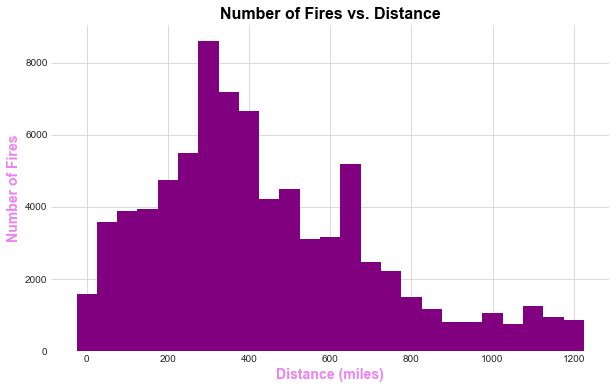

In [73]:
# Visualization #1 plotting Number of Fires vs Distance

import matplotlib.pyplot as plt

# Extracting data for the histogram
distances = [distance_range[0] for distance_range in fire_counts.keys()]
fire_counts_values = list(fire_counts.values())


# Creating the histogram

# Create the histogram with custom styles
plt.figure(figsize=(10, 6))

# Customize the background color
ax = plt.gca()
ax.set_facecolor('white')

plt.grid(True,color='lightgrey')

plt.bar(distances, fire_counts_values, width=50, color = 'purple')
plt.xlabel('Distance (miles)', fontsize=14, fontweight='bold', color='violet')
plt.ylabel('Number of Fires', fontsize=14, fontweight='bold', color='violet')
plt.title('Number of Fires vs. Distance', fontsize=16, fontweight='bold', color='black')
plt.show()


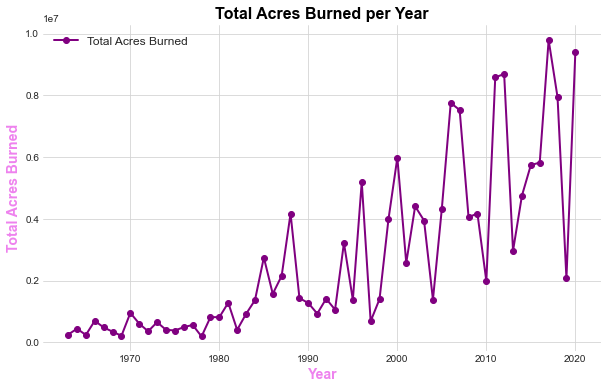

In [75]:
# Visualization # 2 plotting the Total acres burned per year

import matplotlib.pyplot as plt

# Assuming acres_burned_annual is already populated from your provided code

# Extract years and acres burned for plotting
years = list(acres_burned_annual.keys())
acres_burned = list(acres_burned_annual.values())

# Create the time series graph with custom styles
plt.figure(figsize=(10, 6))

# Customize the appearance
plt.plot(years, acres_burned, marker='o', color='purple', linewidth=2, linestyle='-', label='Total Acres Burned')
plt.title('Total Acres Burned per Year', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='violet')
plt.ylabel('Total Acres Burned', fontsize=14, fontweight='bold', color='violet')

# Add a grid for better readability
plt.grid(True,color='lightgrey')

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Customize the background color
ax = plt.gca()
ax.set_facecolor('white')

# Add a border around the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Show the time series graph
plt.show()


Since for the forecasting we require variables we calculate in this file i.e "annual_smoke_impact" we will perform the forecasting in this file itself.
I will be using exponential smoothing from darts package for the time series prediction for the next 25 years and consequently for plotting as well. 

In [83]:
annual_smoke_impact

average_annual_smoke_impact = {}

for year, values in annual_smoke_impact.items():
    average = sum(values) / len(values)
    average_annual_smoke_impact[year] = average

print(average_annual_smoke_impact)

{1963: 9.803164604139589, 1964: 4.335305347674456, 1965: 2.469942803359218, 1966: 8.00138888670883, 1967: 3.259611123497359, 1968: 2.2723916086287144, 1969: 3.2214426328629053, 1970: 3.864143440491255, 1971: 9.668307991291739, 1972: 3.956919924168481, 1973: 8.968927537794976, 1974: 3.846634749381055, 1975: 3.835421448509527, 1976: 6.227620891302049, 1977: 3.1506013478797117, 1978: 1.4048996066397381, 1979: 4.834349522631012, 1980: 5.21779749726782, 1981: 9.349668654490173, 1982: 4.164268856359481, 1983: 9.461752939936005, 1984: 7.042364512347612, 1985: 11.444331348624733, 1986: 15.57160934247458, 1987: 5.2279744495022635, 1988: 8.509479018898558, 1989: 4.631542959039813, 1990: 4.435462221618891, 1991: 3.0697925144548663, 1992: 11.233035829559165, 1993: 2.6044219798939454, 1994: 10.376047582780725, 1995: 6.802915916150562, 1996: 17.524560382432508, 1997: 3.115076750740766, 1998: 4.061441844213445, 1999: 11.285998812863731, 2000: 13.521725703526876, 2001: 7.575926226168239, 2002: 8.86380

I am using ExponentialSmoothing for my time series analysis. It ETS models are a class of models that incorporate exponential smoothing. They come in various forms, including ETS(AAA), ETS(AAN), ETS(MMM), etc., each of which captures different aspects of the time series (error, trend, and seasonality).

They are quite popular to use especially when we have less number of Data points like in this case we have 60 data points. Following is the code for that:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


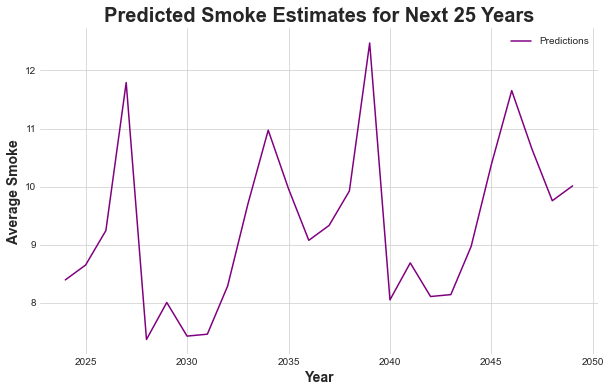

In [124]:
# average_annual_smoke_impact contains the avg smoke estimate 
#(as per my formula) for each year and I am performing the time series forecasting as following

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convert the dictionary to a pandas DataFrame for easier handling
df = pd.DataFrame(list(average_annual_smoke_impact.items()), columns=['Year', 'Average_Smoke'])

# Sort df by year
df = df.sort_values('Year')

# Fit Holt-Winters Exponential Smoothing model
model = ExponentialSmoothing(df['Average_Smoke'], trend='add', seasonal='add', seasonal_periods=12)
results = model.fit()

# Make predictions for the next 25 years
future_years = range(2024, 2050)
pred_future = results.forecast(steps=len(future_years))

# Visualize the predictions

# Create the time series graph with custom styles
plt.figure(figsize=(10, 6))

# Add a grid for better readability
plt.grid(True,color='lightgrey')

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Customize the background color
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(future_years, pred_future, label='Predictions', color='purple')
plt.xlabel('Year', fontweight='bold', fontsize=14)
plt.ylabel('Average Smoke', fontweight='bold', fontsize=14)
plt.title('Predicted Smoke Estimates for Next 25 Years',fontweight='bold', fontsize=20)
plt.legend()
plt.show()